## Task 3: Energy Balance Models, version 3 (EBM3)

Georgina Gomes GMSGEO001

Use a programming language of your choice (Fortran, Matlab, R or Python) to develop Version 3 of the Energy Balance Model (EBM3) by solving the following equation.

$C_p \frac{\partial T_{lat}}{\partial t} = S(1-\alpha) - 4\epsilon \sigma {T_{lat}}^{4} - k(T_{lat} - T_{global})$

 
where $T_{lat}$ is temperature at different latitudes; $T_{global}$ is the global mean temperature and $k$ is the transport coefficient.   


a) Test the sensitivity of the model to heat transport coefficient ($k$). 


b) Which components of the earth climate system do the heat transport simulated in this model? 


c) Mention processes the components use for the heat transport. 


d) Discuss the limitations of using this model for climate change study.

## Part 1:  Test the sensitivity of the model to heat transport coefficient ($k$).

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

### Numerical solution:

To solve this equation which now involves space and time, we will discretize the independent variables like so:

- $T_{lat_i} = T_{lat_0} + i\Delta T $
- $t_n = t_0 + n\Delta t$

To describe the discrete function

${U_{lat_i}}^{n} = U(T_{lat_i}, t_n)$

where 

- $U(T + \Delta T, t) = {U_{lat_i + 1}}^{n}$
- $U(T, t + \Delta t) = {U_{lat_i}}^{n+1}$


We will use a grid system with latitude zones and within each zone $i$ will be $S_i$ and $\alpha_i$

And we will loop over time steps like so:


=> ${T_{lat_{i}}}^{n+1} \approx {T_{lat_i}}^{n} + \frac{\Delta t}{C_p}(S_{lat_i}(1-\alpha_{lat_i}) - 4\epsilon \sigma {T_{lat_i}}^{4} - k(T_{lat_i} - T_{global}))$

Where
- $T_{lat_i}$ is the temperature at latitude $i$
- $S_{lat_i}$ is the incoming solar radiation at latitude $i$
- $\alpha_{lat_i}$ is the albedo at latitude $i$
- $T_{global}$ is the global mean temperature

We solve for ${T_{lat_{i}}}^{n+1}$

In [35]:
def ebm3(S_0, S_frac, alpha, epsilon, sigma, C_p, dt, N_steps, T_init_celsius, k, T_global_celsius, number_of_lat_bands):
    #initialise T_lat (latitudinal temperature array) and T_global
    T_lat = np.zeros((N_steps, number_of_lat_bands))
    T_lat[0, :] = T_init_celsius + 273.15  # Initial T everywhere (Kelvin)
    T_global = T_global_celsius + 273.15

    #initialise latitudes
    latitudes = np.linspace(-90, 90, number_of_lat_bands)
    
    #time stepping
    for n in range(N_steps - 1):
        
        #latitude stepping
        for i in range(number_of_lat_bands):
            S_i = S_0*S_frac[i]
            energy_absorbed_by_earth = S_i * (1 - alpha[i])
            energy_radiated_by_earth = 4*epsilon*sigma*((T_lat[n, i])**4) 
            heat_transport = k*(T_lat[n, i] - T_global)
            dTdt = (energy_absorbed_by_earth - energy_radiated_by_earth - heat_transport)/C_p
            #each element of T_lat corresponds to a latitude band
            T_lat[n+1, i] = T_lat[n, i] + dt*dTdt

        
    T_lat_celsius = T_lat[-1, :] - 273.15
    
    return T_lat_celsius, latitudes

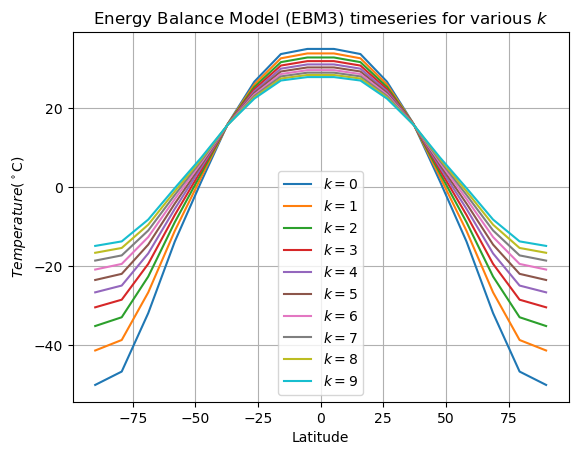

In [36]:
#present case parameters
S_0 = 1372
sigma = 0.0000000567
emissivity = 0.61
C_p = 1.05e23
dt = 1.0e21
Nstep = 1000
T_global_celsius = 15.5
T_init_celsius = 0
S_frac = np.array([0.500, 0.531, 0.624, 0.770, 0.892, 1.021, 1.120, 1.189, 1.219, 1.219, 1.189, 1.120, 1.021, 0.892, 0.770, 0.624, 0.531, 0.500])
alpha = np.array([0.500, 0.500, 0.452, 0.407, 0.357, 0.309, 0.272, 0.248, 0.254, 0.254, 0.248, 0.272, 0.309, 0.357, 0.407, 0.452, 0.500, 0.500])
number_of_lat_bands = 18

k_range = np.arange(0,10,1)

for k in k_range:
    T_lat_celsius, latitudes = ebm3(S_0, S_frac, alpha, emissivity, sigma, C_p, dt, Nstep, T_init_celsius, k, T_global_celsius, number_of_lat_bands)
    plt.plot(latitudes, T_lat_celsius, label=rf"$k = {k}$")

plt.xlabel("Latitude")
plt.ylabel(r"$Temperature (^\circ\text{C})$")
plt.title(r"Energy Balance Model (EBM3) timeseries for various $k$")
plt.grid()
plt.legend()
plt.show()

As the heat transport coefficient increases from 0-9, the poles get warmer and the equator gets colder.

## Part b) Which components of the earth climate system do the heat transport simulated in this model?

This mimics large scale transport of heat in the atmosphere and also in the ocean.

## Part c) Mention processes the components use for the heat transport.

In the atmosphere there are processes such as the Hadley cell which is the process whereby warm air rises at the equator and then spreads out towards 30$^\circ$N and 30$^\circ$S, where it becomes colder and sinks creating a circulation system. In the ocean we have the thermohaline circulation/global ocean conveyer belt whereby currents are driven by density differences as a result of heat/salinity difference.

## d) Discuss the limitations of using this model for climate change study.

Although space and time are now considered in the energy balance model, there is still no acknowledgement of seasons, and the spatial field is very simplified. The heat transport coefficient k is a massive simplification of what is actually going on in terms of heat transport globally.